Simple demo to showcase new `Portfolio` features as well as selecting documents by text.

In [4]:
from datamule import Portfolio, Config

# we can set the default download source for the portfolio to either datamule or sec
# datamule is faster, and has more data, but costs $1/100,000 downloads. SEC is free but rate limited at 5 requests per second.
# sec is the default source
config = Config()
config.set_default_source("datamule") # set default source to datamule
print(f"Default source: {config.get_default_source()}")

Default source: datamule


In [5]:
# Let's subset by some notable companies
# Major company ticker symbols
tickers = [
    # Technology
    "AAPL",    # Apple Inc.
    "MSFT",    # Microsoft Corporation
    "GOOGL",   # Alphabet Inc. (Google)
    "AMZN",    # Amazon.com Inc.
    "META",    # Meta Platforms Inc. (formerly Facebook)
    "NVDA",    # NVIDIA Corporation
    
    # Financial
    "JPM",     # JPMorgan Chase & Co.
    "BAC",     # Bank of America Corporation
    "V",       # Visa Inc.
    "MA",      # Mastercard Incorporated
    
    # Healthcare
    "JNJ",     # Johnson & Johnson
    "UNH",     # UnitedHealth Group Inc.
    "PFE",     # Pfizer Inc.
    
    # Consumer
    "WMT",     # Walmart Inc.
    "PG",      # Procter & Gamble Company
    "KO",      # The Coca-Cola Company
    "PEP",     # PepsiCo Inc.
    
    # Industrial
    "BA",      # Boeing Company
    "CAT",     # Caterpillar Inc.
    "GE"       # General Electric Company
]

In [14]:
for year in range(2020,2025):
    # create a portfolio object
    portfolio = Portfolio(f'ingest/covid_8k_{year}')
    portfolio.download_submissions(submission_type='8-K',filing_date=(f'{year}-01-01',f'{year}-12-31'),ticker=tickers)


Cost: $0.003280000000 downloads + $0.000070564000 row reads = $0.003350564000
Balance: $7.480787028000


Processing files: 100%|██████████| 328/328 [00:09<00:00, 36.35it/s]



Processing completed in 9.03 seconds

Cost: $0.002890000000 downloads + $0.000072886000 row reads = $0.002962886000
Balance: $7.477824142000


Processing files: 100%|██████████| 289/289 [00:11<00:00, 25.80it/s] 



Processing completed in 11.21 seconds

Cost: $0.002610000000 downloads + $0.000068237000 row reads = $0.002678237000
Balance: $7.475145905000


Processing files: 100%|██████████| 261/261 [00:08<00:00, 29.72it/s]



Processing completed in 8.79 seconds

Cost: $0.002490000000 downloads + $0.000070589000 row reads = $0.002560589000
Balance: $7.472585316000


Processing files: 100%|██████████| 249/249 [00:11<00:00, 21.73it/s]



Processing completed in 11.48 seconds

Cost: $0.002520000000 downloads + $0.000067154000 row reads = $0.002587154000
Balance: $7.469998162000


Processing files: 100%|██████████| 252/252 [00:10<00:00, 24.57it/s]


Processing completed in 10.27 seconds


In [15]:
# Let's count the number of documents that mention "covid-19" for each company
all_documents = {}
for year in range(2020, 2025):
    portfolio = Portfolio(f'ingest/covid_8k_{year}')
    for document in portfolio.contains_string(r'(?i)covid-19'):
        doc_type = document.type
        if doc_type not in all_documents:
            all_documents[doc_type] = {yr: 0 for yr in range(2020, 2025)}
        all_documents[doc_type][year] += 1

Loading 328 submissions


Searching for '(?i)covid-19': 100%|██████████| 6040/6040 [00:09<00:00, 611.34it/s] 


Loading 289 submissions


Searching for '(?i)covid-19': 100%|██████████| 5299/5299 [00:05<00:00, 1011.34it/s]


Loading 261 submissions


Searching for '(?i)covid-19': 100%|██████████| 4796/4796 [00:05<00:00, 918.72it/s] 


Loading 249 submissions


Searching for '(?i)covid-19': 100%|██████████| 4940/4940 [00:05<00:00, 842.32it/s] 


Loading 252 submissions


Searching for '(?i)covid-19': 100%|██████████| 4764/4764 [00:05<00:00, 831.16it/s] 


<Figure size 1200x600 with 0 Axes>

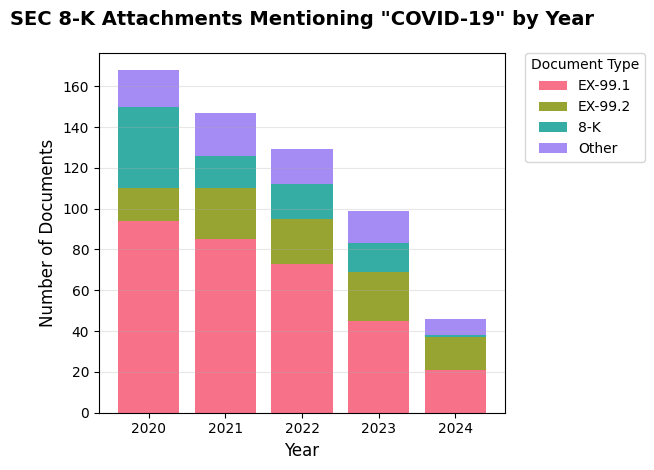


Raw counts:
      EX-99.1  EX-99.2  8-K  Other
Year                              
2020       94       16   40     18
2021       85       25   16     21
2022       73       22   17     17
2023       45       24   14     16
2024       21       16    1      8


In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Convert to DataFrame 
df = pd.DataFrame(all_documents)
df.index = [str(year) for year in range(2020, 2025)]
df.index.name = 'Year'

# Calculate total counts for each attachment type
type_totals = df.sum()
top_3_types = type_totals.nlargest(3).index.tolist()

# Create 'Other' category for remaining types
df['Other'] = df[df.columns[~df.columns.isin(top_3_types)]].sum(axis=1)
df_final = df[top_3_types + ['Other']]

# Set up the plot style
plt.figure(figsize=(12, 6))

# Create stacked bar chart with log transform
ax = df_final.plot(kind='bar', stacked=True, 
                  color=sns.color_palette("husl", len(df_final.columns)),
                  width=0.8)


# Customize the plot
plt.title('SEC 8-K Attachments Mentioning "COVID-19" by Year', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)

# Adjust legend
plt.legend(title='Document Type', 
          bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          borderaxespad=0.)

# Add gridlines for better readability
plt.grid(True, axis='y', alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('plots/covid_19_mentions_8k.png', 
            bbox_inches='tight', 
            dpi=300)

# Display plot
plt.show()

# Print the raw numbers
print("\nRaw counts:")
print(df_final)